## Homework Week2. Linear Regressian

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head(10)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
6,240,7.0,127.0,3006.542287,22.2,2012,USA,Gasoline,Front-wheel drive,1.0,13.210412
7,150,4.0,239.0,3638.657780,17.3,2020,USA,Diesel,All-wheel drive,1.0,12.848884
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
9,150,4.0,123.0,3509.036569,10.2,2005,USA,Gasoline,Front-wheel drive,-1.0,12.298355


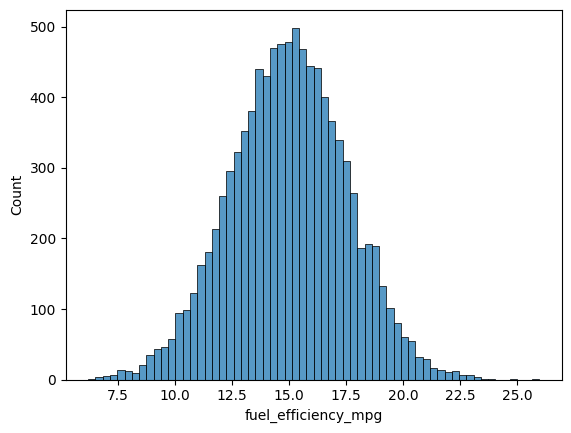

In [127]:
sns.histplot(df['fuel_efficiency_mpg'], kde=False)
plt.show()

In [128]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head(10)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
5,190,NaN,2484.883986,2008,17.271818
6,240,127.0,3006.542287,2012,13.210412
7,150,239.0,3638.657780,2020,12.848884
8,250,174.0,2714.219310,2016,16.823554
9,150,123.0,3509.036569,2005,12.298355


In [129]:
df['fuel_efficiency_mpg'].head()

0    13.231729
1    13.688217
2    14.246341
3    16.912736
4    12.488369
Name: fuel_efficiency_mpg, dtype: float64

### Question 1.

In [130]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2.

In [131]:
df['horsepower'].median()

np.float64(149.0)

### Prepare data

In [ ]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [133]:
n, n_val + n_test + n_train

(9704, 9704)

In [134]:
idx = np.arange(n)

In [ ]:
np.random.seed(42)
np.random.shuffle(idx)

In [136]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [137]:
df_train.head(5)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [138]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [139]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [140]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [141]:
def get_X_fillna_zero(df_train):
    X_train_zero = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train_zero, y_train)
    y_pred = w0 + X_train_zero.dot(w)
    return y_pred

In [142]:
def get_X_fillna_mean(df_train):
    X_train_mean = df_train.fillna(df_train['horsepower'].mean()).values
    w0, w = train_linear_regression(X_train_mean, y_train)
    y_pred = w0 + X_train_mean.dot(w)
    return y_pred

In [143]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Question 3.

In [ ]:
rmse(y_train, get_X_fillna_zero(df_train)) # this mean value is better

np.float64(2.2075673924219358e-10)

In [ ]:
rmse(y_train, get_X_fillna_mean(df_train))

np.float64(4.3263401845020925e-10)

### Question 4.

In [146]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [148]:
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [152]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in r_values:
    # training part
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    # validation part
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    if r == 1:
        print("")
        print("this is the best value")
        print(f"r value: {r}, w0 value: {w0}, score: {score}")
        print("")
    else:
        print(f"r value: {r}, w0 value: {w0}, score: {score}")


r value: 0, w0 value: 3.041105145484835e-10, score: 2.207410886617643e-10
r value: 0.01, w0 value: 0.00015740839812927732, score: 3.2654410556418096e-06
r value: 0.1, w0 value: 0.0006985956202210097, score: 3.2242793978866304e-05

this is the best value
r value: 1, w0 value: 0.0010640855052339582, score: 0.00032091893514709334

r value: 5, w0 value: 0.001113356715111008, score: 0.0016002003231290823
r value: 10, w0 value: 0.0011168024989259423, score: 0.003190532932813163
r value: 100, w0 value: 0.0010649379815505953, score: 0.03024377220492505


<Axes: ylabel='Count'>

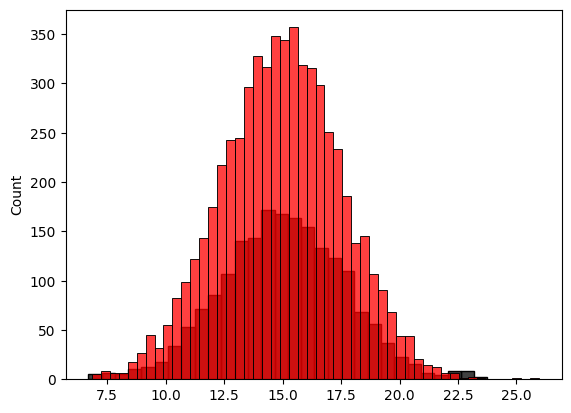

In [153]:
sns.histplot(y_pred, color='black')
sns.histplot(y_train, color='red')

### Question 5.

In [203]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []


for s in seeds:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test


    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)


    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    # training part
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    # validation part
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    scores.append(score)
    
    print(f"seed value: {s}, score: {score}")


seed value: 0, score: 2.6538029011129414
seed value: 1, score: 2.6513394846088905
seed value: 2, score: 2.651883398196657
seed value: 3, score: 2.653138048835208
seed value: 4, score: 2.652685658246625
seed value: 5, score: 2.6527505961250744
seed value: 6, score: 2.6516540272243296
seed value: 7, score: 2.651577266986485
seed value: 8, score: 2.6511264706425792
seed value: 9, score: 2.6525048025150775


In [201]:
round(np.std(scores), 3)

np.float64(0.001)